In [1]:
# Python library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
dfCSV = pd.read_csv("lodgingdata.csv")

In [3]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Residential','EmploymentStatus','MaritalStatus','HouseholdCategory','OftenTravel','TravellingFor','Seasons','LodgingLocation','LodgingType']
le = LabelEncoder()
for i in var_mod:
    dfCSV[i] = le.fit_transform(dfCSV[i])


dfCSV.head(20)


,Age,Gender,Residential,EmploymentStatus,MaritalStatus,HouseholdCategory,OftenTravel,TravellingFor,YearlyTravel,StayDuration,PeopleDuringTravel,LodgingBudget,Seasons,LodgingLocation,LodgingType
0,25,0,1,0,1,1,0,1,3,4,4,800,4,1,1
1,25,0,0,0,1,1,0,2,3,3,7,700,0,2,1
2,21,0,1,4,1,0,1,2,2,3,6,900,0,2,0
3,21,1,0,4,1,0,1,2,2,5,4,500,3,3,0
4,39,1,0,0,0,1,0,0,4,7,6,1000,3,1,1
5,35,1,0,0,0,2,0,2,1,10,8,800,3,1,1
6,52,1,0,0,0,2,0,2,2,10,8,900,0,3,1
7,28,0,0,0,1,2,0,1,1,14,9,300,3,2,1
8,35,0,1,0,0,1,0,2,2,7,4,400,3,3,1
9,33,0,1,5,0,1,0,1,1,8,2,325,0,0,1


In [4]:
dfCSV.corr()

,Age,Gender,Residential,EmploymentStatus,MaritalStatus,HouseholdCategory,OftenTravel,TravellingFor,YearlyTravel,StayDuration,PeopleDuringTravel,LodgingBudget,Seasons,LodgingLocation,LodgingType
Age,1.000000,0.014318,0.026917,-0.347560,-0.568421,0.326505,0.058773,-0.249340,0.117981,0.279950,-0.137382,0.240823,0.011468,-0.295670,0.333575
Gender,0.014318,1.000000,-0.055878,-0.069944,-0.009997,0.136507,0.020194,-0.045596,0.086155,0.041711,-0.033345,0.028044,0.018846,-0.068593,0.070564
Residential,0.026917,-0.055878,1.000000,-0.118454,0.028928,0.071896,-0.019110,-0.034527,0.006765,0.024737,-0.058442,0.160804,0.013532,-0.049343,0.122091
EmploymentStatus,-0.347560,-0.069944,-0.118454,1.000000,0.303240,-0.330452,0.047364,0.235364,-0.054835,-0.132384,0.117051,-0.360763,-0.008454,0.395606,-0.536055
MaritalStatus,-0.568421,-0.009997,0.028928,0.303240,1.000000,-0.292296,0.063067,0.241062,-0.075955,-0.213203,0.117145,-0.262735,-0.015973,0.265895,-0.347382
HouseholdCategory,0.326505,0.136507,0.071896,-0.330452,-0.292296,1.000000,-0.007640,-0.185911,0.130282,0.253080,-0.118547,0.426651,0.059757,-0.410211,0.523179
OftenTravel,0.058773,0.020194,-0.019110,0.047364,0.063067,-0.007640,1.000000,-0.113387,0.323307,0.133971,0.002662,-0.086078,0.180783,0.091585,-0.163561
TravellingFor,-0.249340,-0.045596,-0.034527,0.235364,0.241062,-0.185911,-0.113387,1.000000,-0.302374,-0.197727,0.091667,-0.122696,-0.128666,0.183609,-0.246589
YearlyTravel,0.117981,0.086155,0.006765,-0.054835,-0.075955,0.130282,0.323307,-0.302374,1.000000,0.130369,-0.092498,0.037746,0.322024,-0.086671,0.071631
StayDuration,0.279950,0.041711,0.024737,-0.132384,-0.213203,0.253080,0.133971,-0.197727,0.130369,1.000000,-0.051200,0.172182,0.025323,-0.081161,0.185218


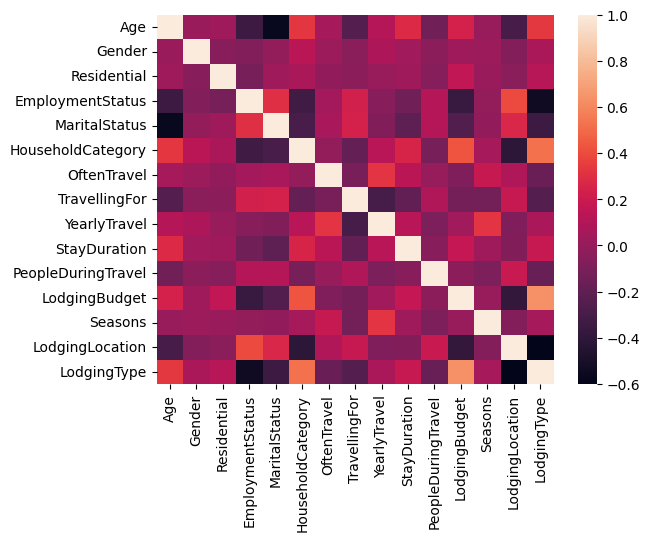

In [5]:
sns.heatmap(dfCSV.corr());

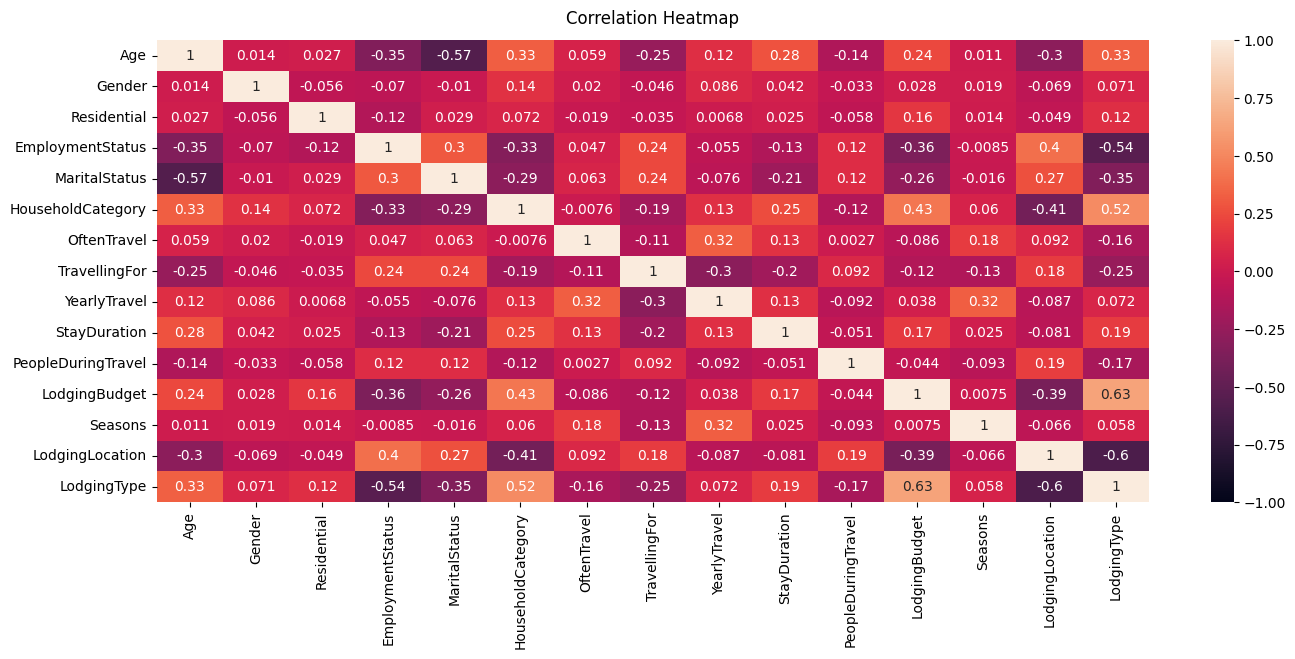

In [6]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dfCSV.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

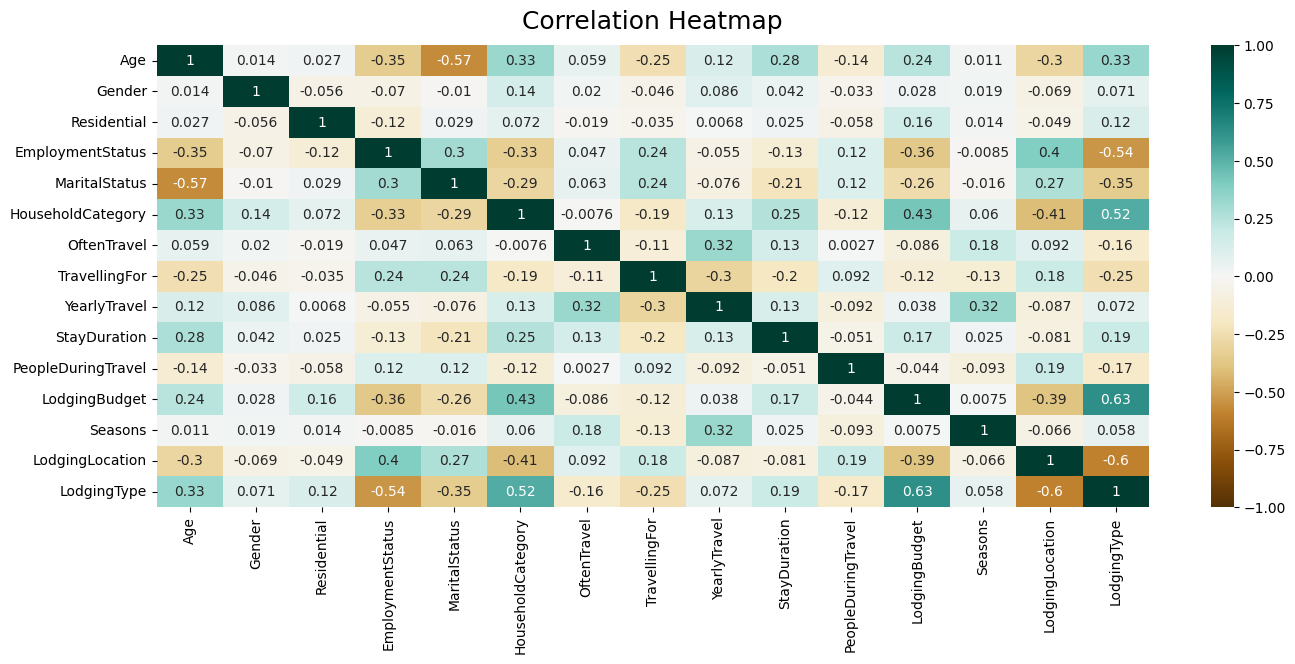

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfCSV.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [8]:
np.triu(np.ones_like(dfCSV.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

In [9]:
import numpy as np
np.bool = np.bool_

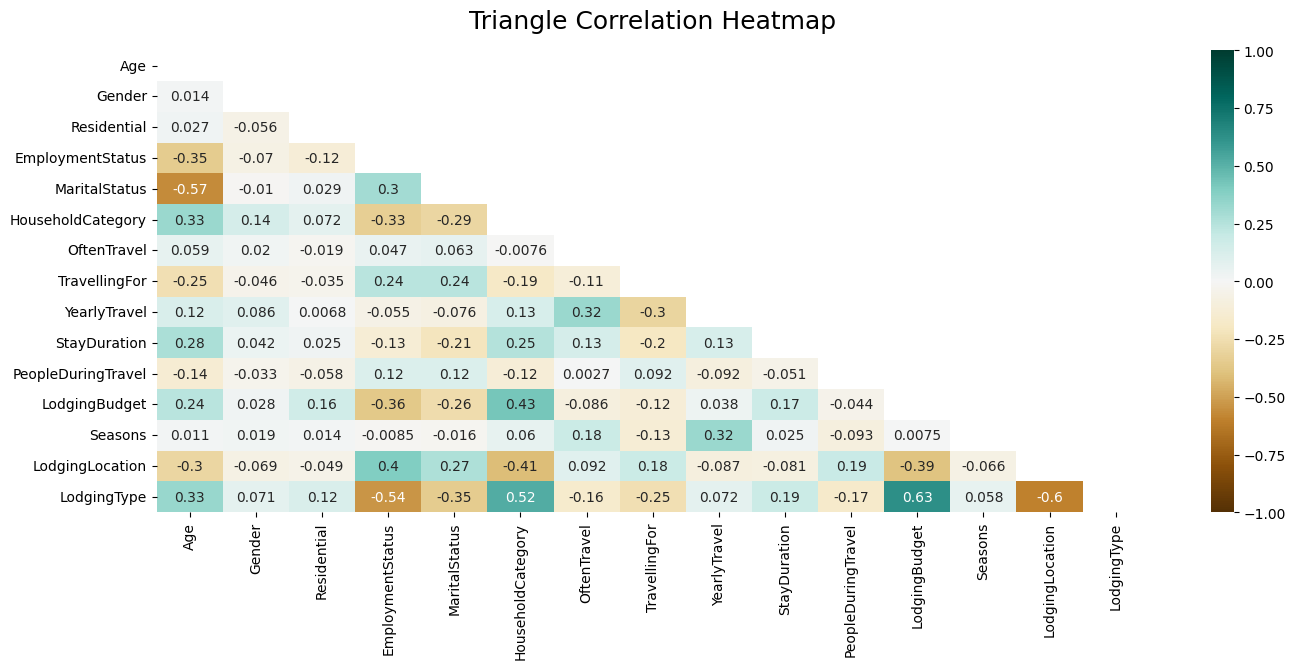

In [10]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dfCSV.corr(), dtype=np.bool))
heatmap = sns.heatmap(dfCSV.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [11]:
dfCSV.corr()[['Age']].sort_values(by='Age', ascending=False)

,Age
Age,1.000000
LodgingType,0.333575
HouseholdCategory,0.326505
StayDuration,0.279950
LodgingBudget,0.240823
YearlyTravel,0.117981
OftenTravel,0.058773
Residential,0.026917
Gender,0.014318
Seasons,0.011468


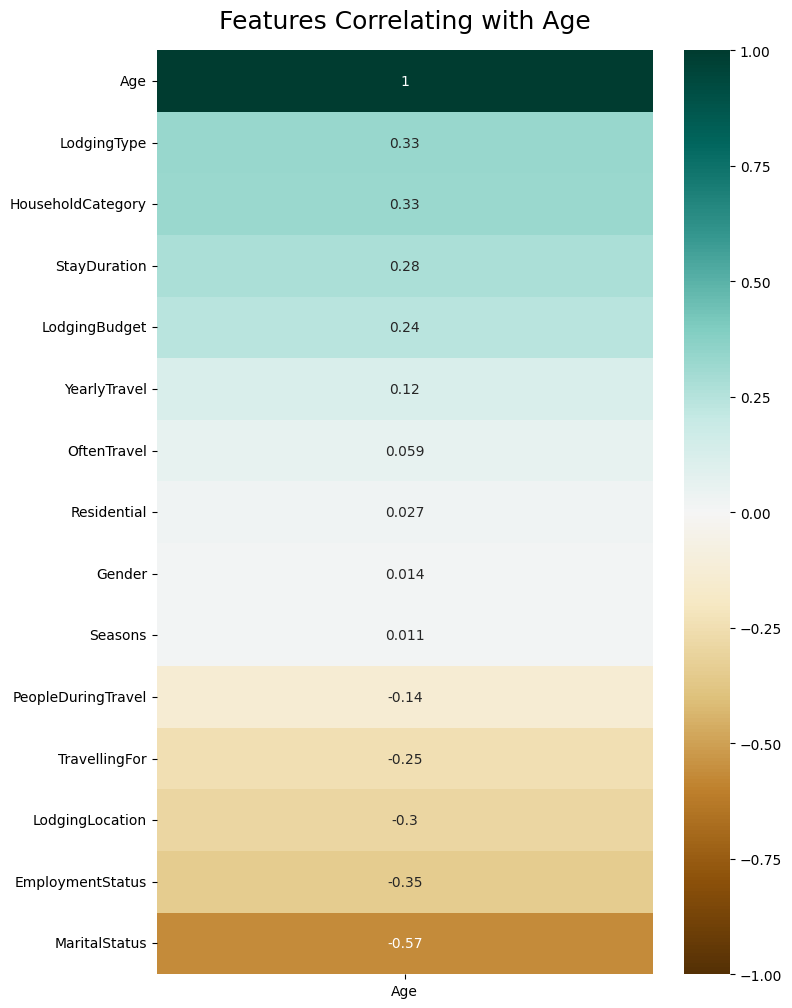

In [12]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dfCSV.corr()[['Age']].sort_values(by='Age', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Age', fontdict={'fontsize':18}, pad=16);

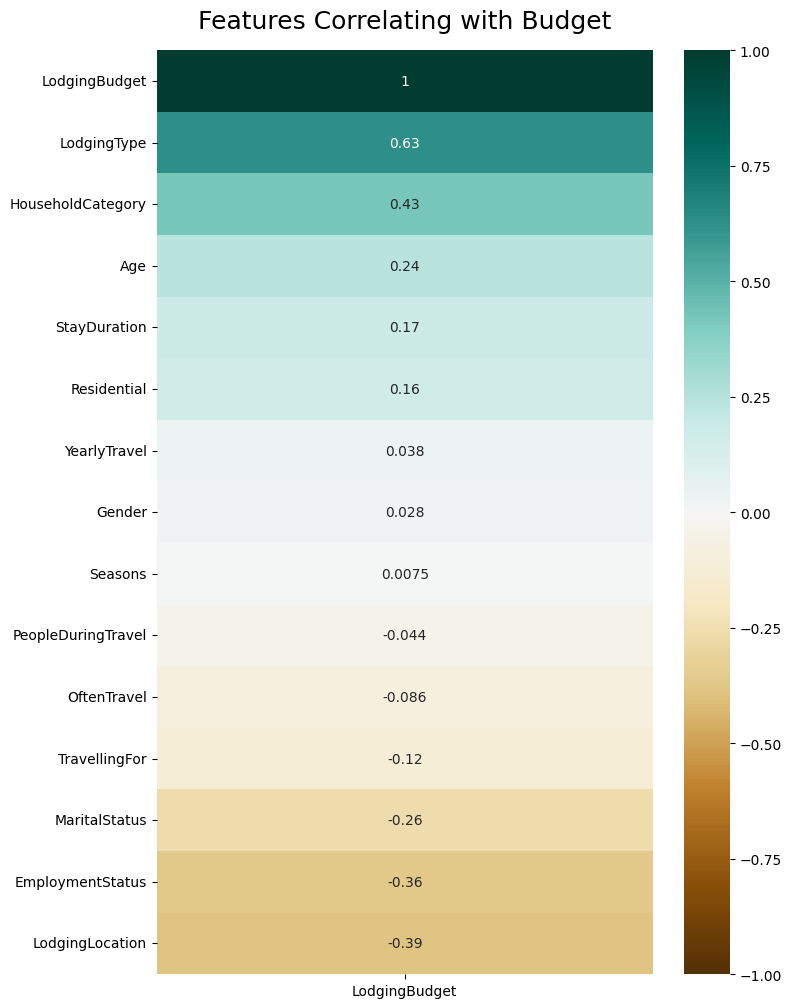

In [13]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dfCSV.corr()[['LodgingBudget']].sort_values(by='LodgingBudget', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Budget', fontdict={'fontsize':18}, pad=16);

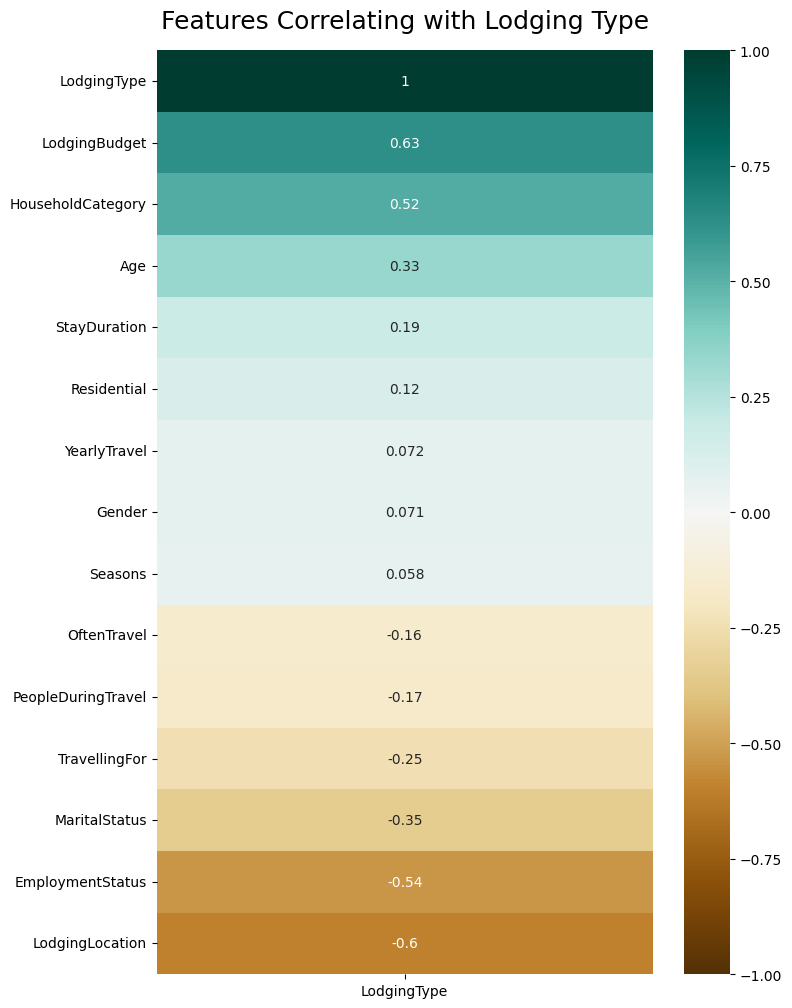

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dfCSV.corr()[['LodgingType']].sort_values(by='LodgingType', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Lodging Type', fontdict={'fontsize':18}, pad=16);